# 从图像文件夹训练像素分类器
在训练像素分类器时，使用多张图像进行训练通常是有意义的。例如，当图像看起来不同时，特别是在不同条件下，有必要使用来自所有条件的多张图像来训练分类器。

在这个笔记本中，我们将演示如何使用包含训练数据对的两个文件夹来训练[APOC](https://github.com/haesleinhuepf/apoc)分类器。

In [1]:
import apoc
import os
from skimage.io import imread
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

## 数据准备
我们首先选择两个输入文件夹。一个包含图像，另一个包含稀疏标注的标签图像。这些文件夹中的文件名必须成对相同。我们还会快速查看这些文件夹。

出于演示目的，我们重复使用[BBBC007数据集](https://bbbc.broadinstitute.org/BBBC007)版本1的数据（Jones等人，Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications，2005），该数据集可从Broad Bioimage Benchmark Collection获得[Ljosa等人，Nature Methods，2012](http://dx.doi.org/10.1038/nmeth.2083)。

In [2]:
image_folder = "../../data/BBBC007/images/"
masks_folder = "../../data/BBBC007/masks/"

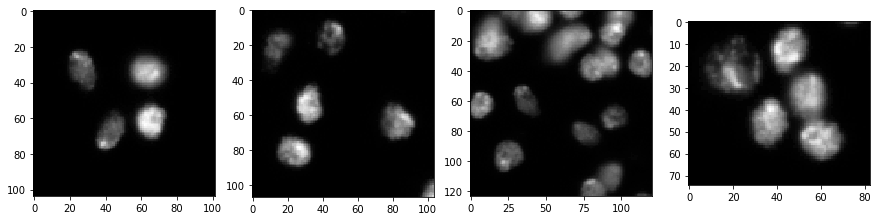

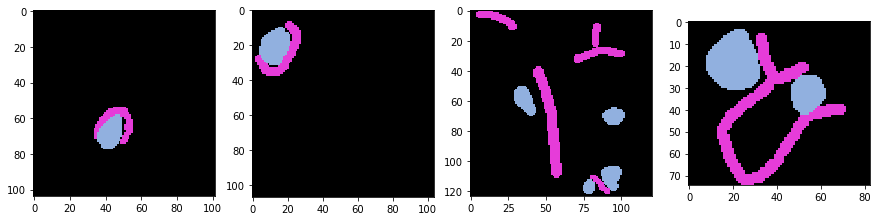

In [3]:
file_list = os.listdir(image_folder)

# 显示所有图像
fig, axs = plt.subplots(1, 4, figsize=(15,15))
for i, filename in enumerate(file_list):
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[i])
plt.show()
    
# 显示对应的标签图像
fig, axs = plt.subplots(1, 4, figsize=(15,15))
for i, filename in enumerate(file_list):
    masks = imread(masks_folder + filename)
    cle.imshow(masks, plot=axs[i], labels=True)
plt.show()


## 训练
如果文件夹设置正确，我们可以将文件夹传递给训练程序。

In [4]:
# 设置分类器及其保存位置
segmenter = apoc.ObjectSegmenter(opencl_filename="test2.cl")

# 设置用于训练的特征集
features = apoc.PredefinedFeatureSet.object_size_1_to_5_px.value

# 从文件夹训练分类器
apoc.train_classifier_from_image_folders(
    segmenter, 
    features, 
    image = image_folder, 
    ground_truth = masks_folder)

## 预测
训练完成后，我们可以将分类器应用于图像文件夹中的所有图像。以下代码行从磁盘重新加载分类器。通过这种方式，我们可以确保它被正确存储。

In [5]:
segmenter = apoc.ObjectSegmenter(opencl_filename="test2.cl")

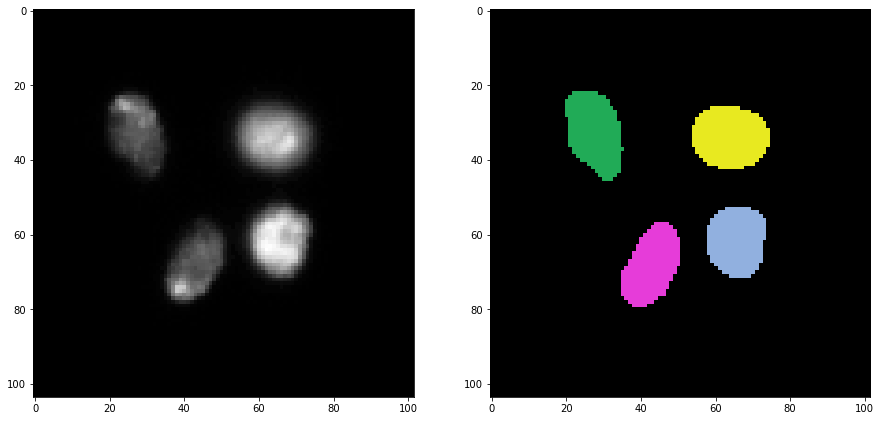

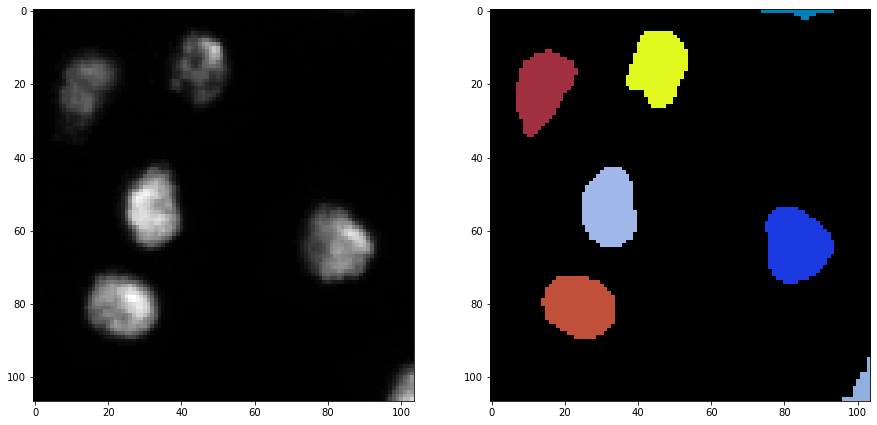

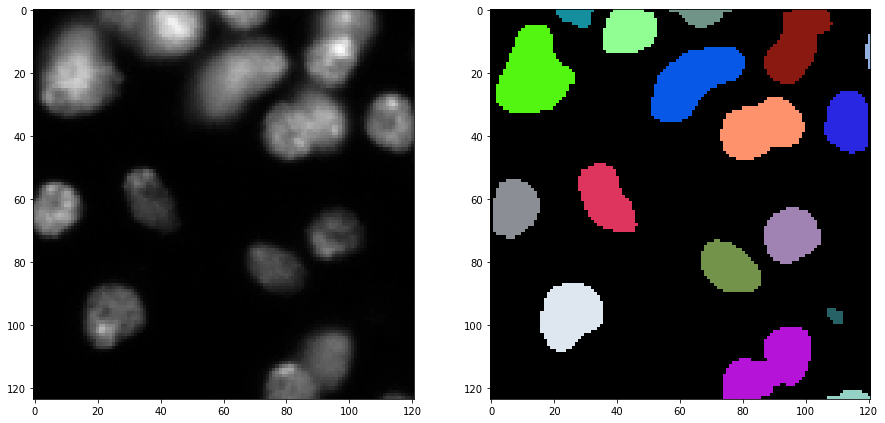

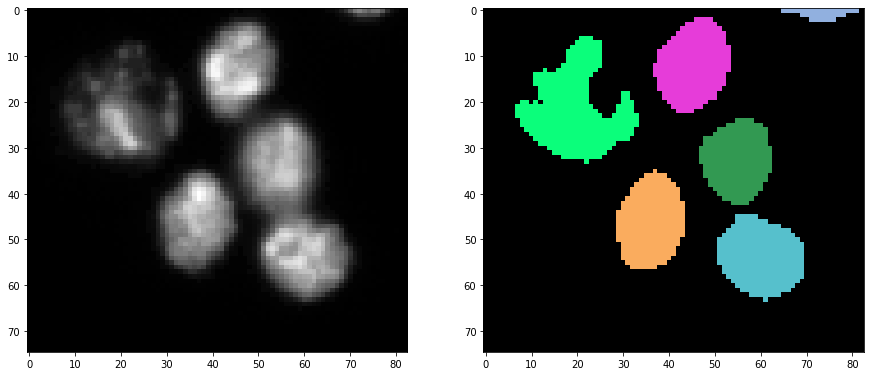

In [6]:
# 显示所有图像
for i, filename in enumerate(file_list):
    fig, axs = plt.subplots(1, 2, figsize=(15,15))
    
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[0])
    
    labels = segmenter.predict(image)
    cle.imshow(labels, plot=axs[1], labels=True)
    
    plt.show()